In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [57]:
 df_images = pd.read_csv('/home/studs/Downloads/LIDC-IDRI_MetaData.csv')

In [58]:
selected_columns = df_images[['Number of images', 'Modality']]
print(selected_columns.describe(include='all'))

        Number of images Modality
count        1300.000000     1300
unique               NaN        3
top                  NaN       CT
freq                 NaN     1011
mean          186.900769      NaN
std           153.796633      NaN
min             1.000000      NaN
25%           108.750000      NaN
50%           141.000000      NaN
75%           262.000000      NaN
max           764.000000      NaN


In [41]:
df_nod = pd.read_excel('/home/studs/Downloads/lidc-idri-nodule-counts-6-23-2015.xlsx')

In [42]:
print(df_nod.describe())

       Total Number of Nodules*   Number of Nodules >=3mm**  \
count                1019.000000                1019.000000   
mean                   14.467125                   5.238469   
std                   230.832409                  83.570971   
min                     0.000000                   0.000000   
25%                     3.000000                   1.000000   
50%                     5.000000                   2.000000   
75%                     9.000000                   3.000000   
max                  7371.000000                2669.000000   

       Number of Nodules <3mm***  Unnamed: 4  
count                1019.000000         0.0  
mean                    9.228656         NaN  
std                   147.329148         NaN  
min                     0.000000         NaN  
25%                     1.000000         NaN  
50%                     3.000000         NaN  
75%                     5.000000         NaN  
max                  4702.000000         NaN  


In [28]:
file_path = '/home/studs/Downloads/tcia-diagnosis-data-2012-04-20.xls'
df_dgs = pd.read_excel(file_path, engine='xlrd')

In [29]:
bins = [0, 1, 2, 3, 4]
labels = ['Unknown', 'Benign', 'Malignant', 'Malignant Metatastic']

diagnostic = pd.cut(df_dgs['Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n'], bins=bins, labels=labels, right=False)

frequency = diagnostic.value_counts(normalize=True) * 100

print(frequency)

Malignant Metatastic    32.484076
Malignant               27.388535
Benign                  22.929936
Unknown                 17.197452
Name: Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n, dtype: float64


In [66]:
combined_df = pd.merge(df_nod, df_dgs, on='TCIA Patient ID')

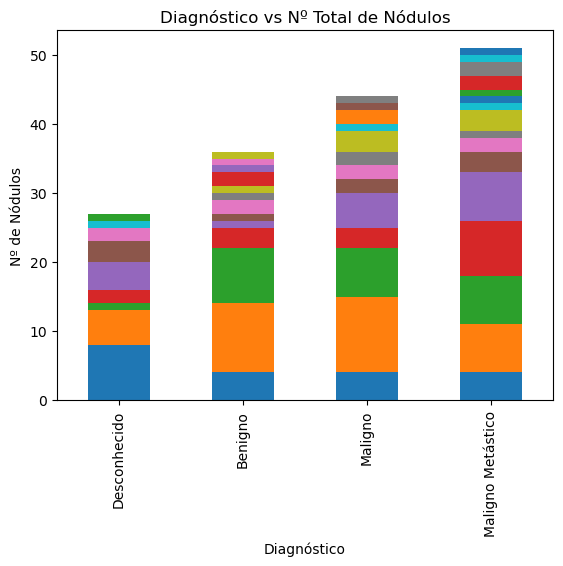

In [67]:
frequency_table = combined_df.groupby(['Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n', 'Total Number of Nodules* ']).size().unstack(fill_value=0)
frequency_table.plot(kind='bar', stacked=True)
plt.title('Diagnóstico vs Nº Total de Nódulos')
plt.xlabel('Diagnóstico')
plt.ylabel('Nº de Nódulos')
plt.legend().remove()
plt.xticks(ticks=[0, 1, 2, 3], labels=['Desconhecido', 'Benigno', 'Maligno', 'Maligno Metástico'])
plt.show()


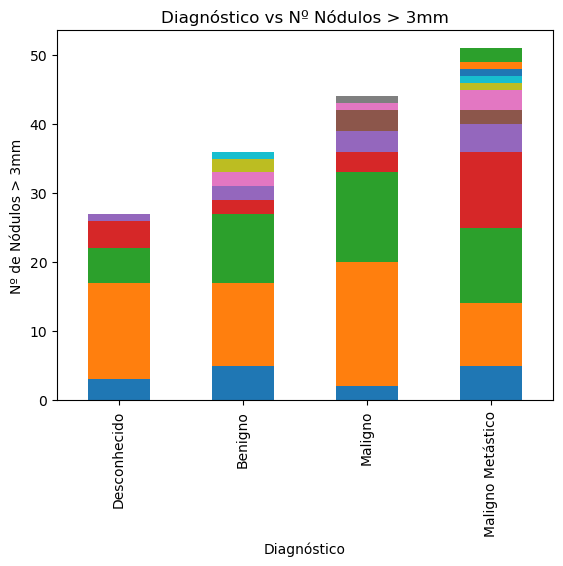

In [68]:
frequency_table = combined_df.groupby(['Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n', 'Number of Nodules >=3mm**']).size().unstack(fill_value=0)
frequency_table.plot(kind='bar', stacked=True)
plt.title('Diagnóstico vs Nº Nódulos > 3mm')
plt.xlabel('Diagnóstico')
plt.ylabel('Nº de Nódulos > 3mm')
plt.legend().remove()
plt.xticks(ticks=[0, 1, 2, 3], labels=['Desconhecido', 'Benigno', 'Maligno', 'Maligno Metástico'])
plt.show()


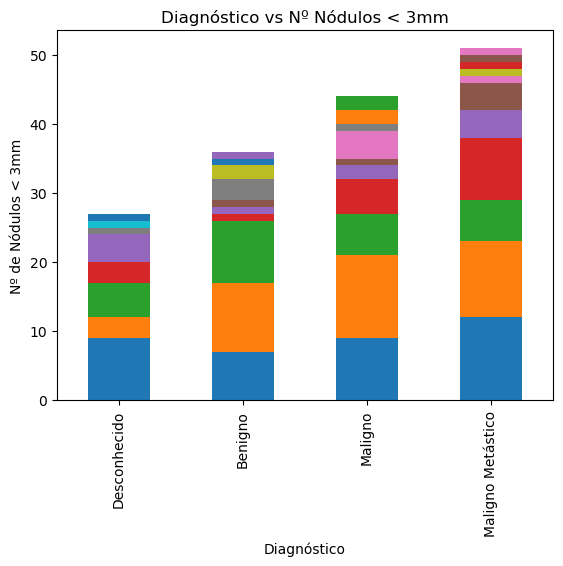

In [69]:
frequency_table = combined_df.groupby(['Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n', 'Number of Nodules <3mm***']).size().unstack(fill_value=0)
frequency_table.plot(kind='bar', stacked=True)
plt.title('Diagnóstico vs Nº Nódulos < 3mm')
plt.xlabel('Diagnóstico')
plt.ylabel('Nº de Nódulos < 3mm')
plt.legend().remove()
plt.xticks(ticks=[0, 1, 2, 3], labels=['Desconhecido', 'Benigno', 'Maligno', 'Maligno Metástico'])
plt.show()

In [73]:
combined_df2 = pd.merge(df_nod, df_images, on='TCIA Patient ID')

In [77]:
frequency_table = combined_df2.groupby(['Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n', 'Number of images']).size().unstack(fill_value=0)
frequency_table.plot(kind='bar', stacked=True)
plt.title('Diagnóstico vs Nº de imagens')
plt.xlabel('Diagnóstico')
plt.ylabel('Nº de imagens')
plt.legend().remove()
plt.xticks(ticks=[0, 1, 2, 3], labels=['Desconhecido', 'Benigno', 'Maligno', 'Maligno Metástico'])
plt.show()

KeyError: 'Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n'